# Task-03: Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioural data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository

In [30]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('bank_full.csv')

In [5]:
df.shape


(45211, 17)

In [6]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.934551,1362.955851,15.822986,258.433921,2.753401,40.391520,0.583929
std,10.638710,3048.552120,8.337442,257.380038,3.081348,100.283775,2.306067
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,447.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
df['job'].value_counts()

blue-collar      9717
management       9458
technician       7604
admin.           5164
services         4147
retired          2279
self-employed    1579
entrepreneur     1481
unemployed       1307
housemaid        1241
student           948
unknown           286
Name: job, dtype: int64

# Data Preprocessing

In [10]:
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [11]:
df.duplicated().sum()

113

In [13]:
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
print("success")

success


In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(45098, 17)

# Data Visualisation

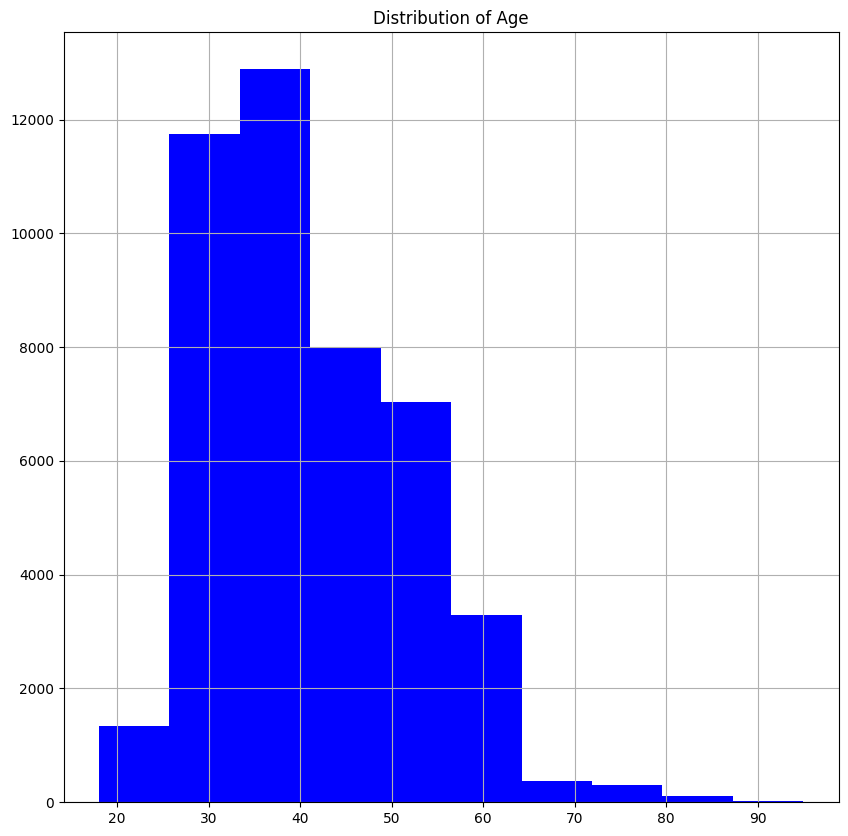

In [19]:
#Visualizing Columns Using histplot
df['age'].hist(figsize=(10,10),color='Blue')
plt.title('Distribution of Age')
plt.show()

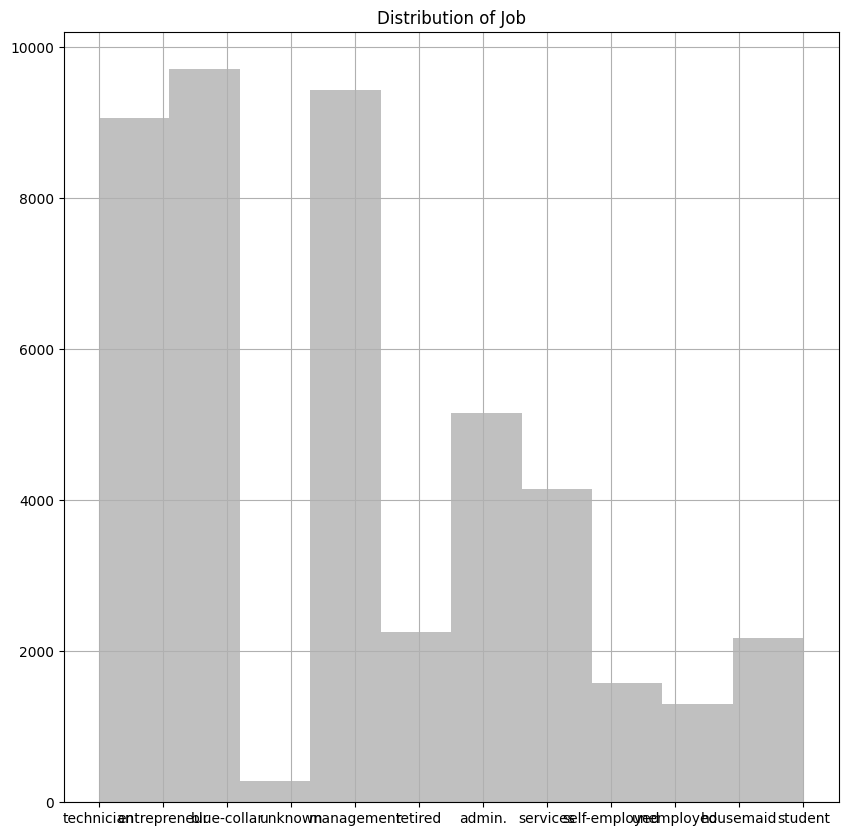

In [22]:
#Visualizing Columns Using histplot
df['job'].hist(figsize=(10,10),color='silver')
plt.title('Distribution of Job')
plt.show()

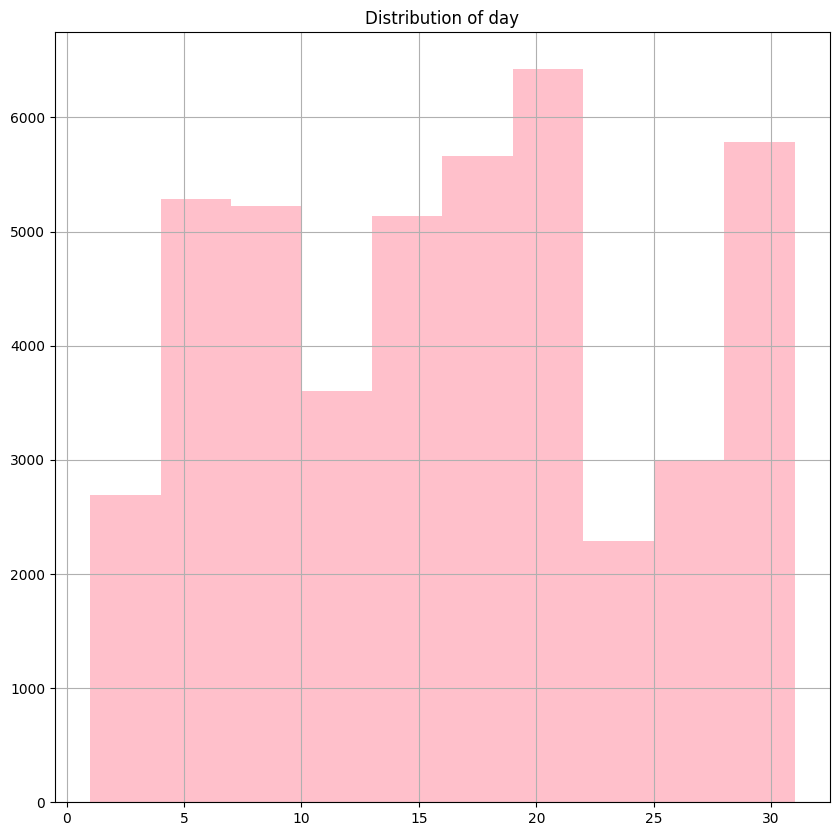

In [21]:
#Visualizing Columns Using histplot
df['day'].hist(figsize=(10,10),color='pink')
plt.title('Distribution of day')
plt.show()

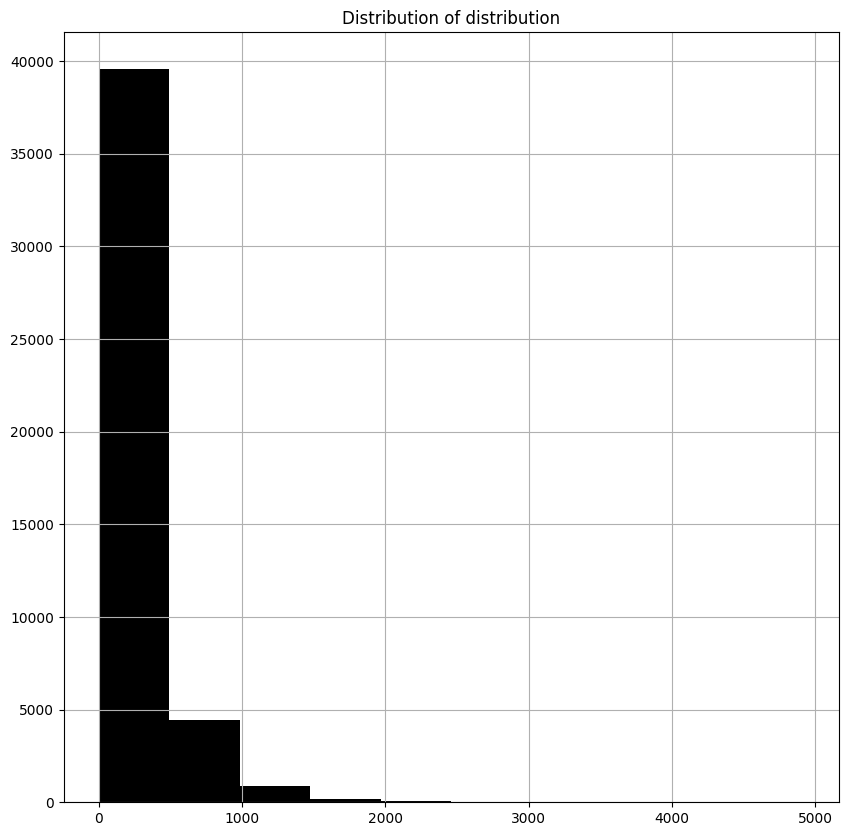

In [23]:
#Visualizing Columns Using histplot
df['duration'].hist(figsize=(10,10),color='Black')
plt.title('Distribution of distribution')
plt.show()

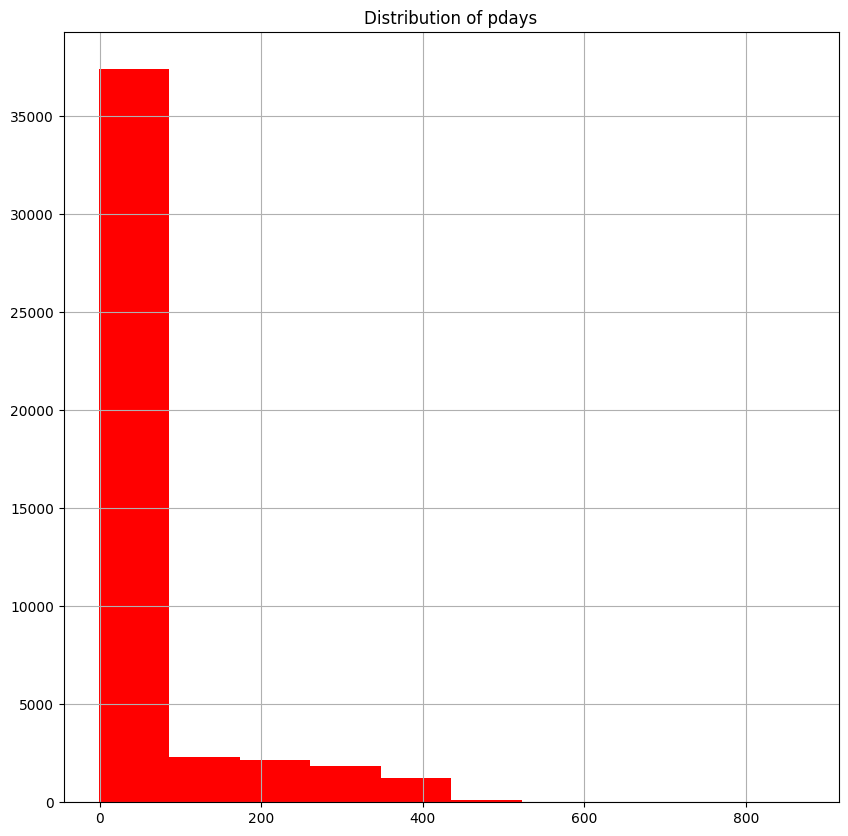

In [24]:
#Visualizing Columns Using histplot
df['pdays'].hist(figsize=(10,10),color='red')
plt.title('Distribution of pdays')
plt.show()

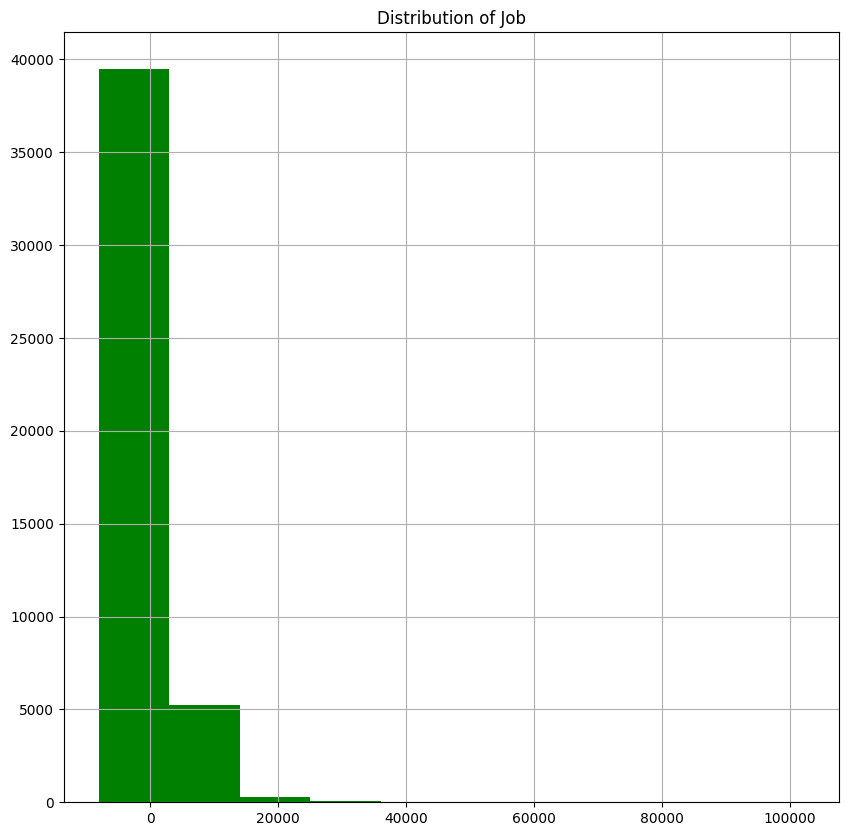

In [25]:
#Visualizing Columns Using histplot
df['balance'].hist(figsize=(10,10),color='green')
plt.title('Distribution of Job')
plt.show()

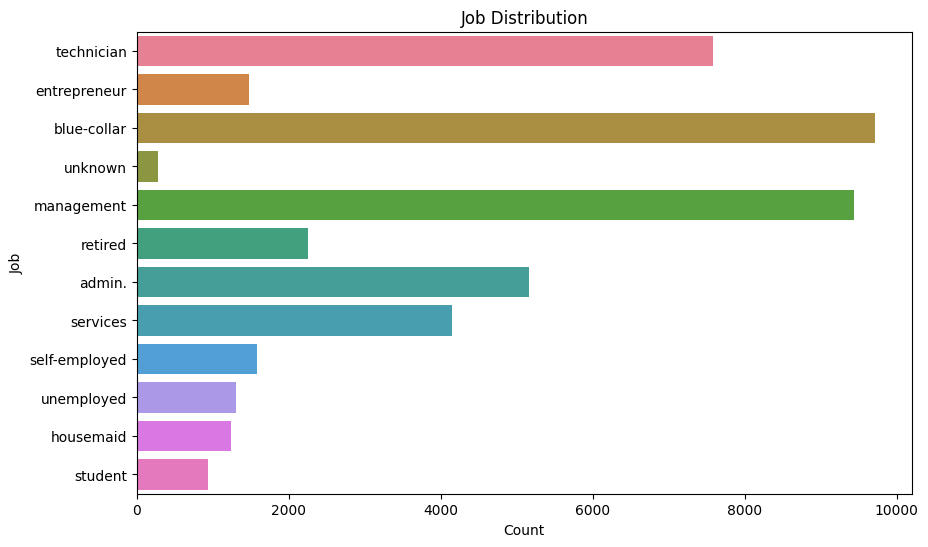

In [26]:
#Visualizing Columns Using countplot
plt.figure(figsize=(10, 6))
sns.countplot(y='job', data=df, hue='job')
plt.title('Job Distribution')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()

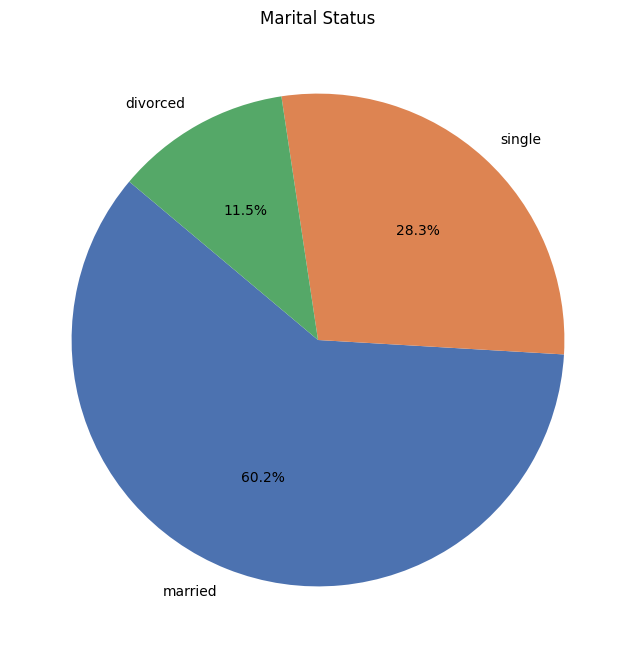

In [27]:
#  pie chart
marital_counts = df['marital'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', colors=sns.color_palette('deep'), startangle=140)
plt.title('Marital Status')
plt.show()

In [28]:
my_df=df.select_dtypes(exclude=[object])
my_df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097553,-0.009495,-0.004058,0.004711,-0.023444,0.001501
balance,0.097553,1.000000,0.004453,0.021777,-0.014499,0.003516,0.016733
day,-0.009495,0.004453,1.000000,-0.029481,0.161978,-0.092608,-0.051434
duration,-0.004058,0.021777,-0.029481,1.000000,-0.082864,-0.002206,0.000813
campaign,0.004711,-0.014499,0.161978,-0.082864,1.000000,-0.087966,-0.032319
pdays,-0.023444,0.003516,-0.092608,-0.002206,-0.087966,1.000000,0.454692
previous,0.001501,0.016733,-0.051434,0.000813,-0.032319,0.454692,1.000000


C:\Users\vivek\AppData\Local\Temp\ipykernel_20268\1449744560.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Set3', annot=True)


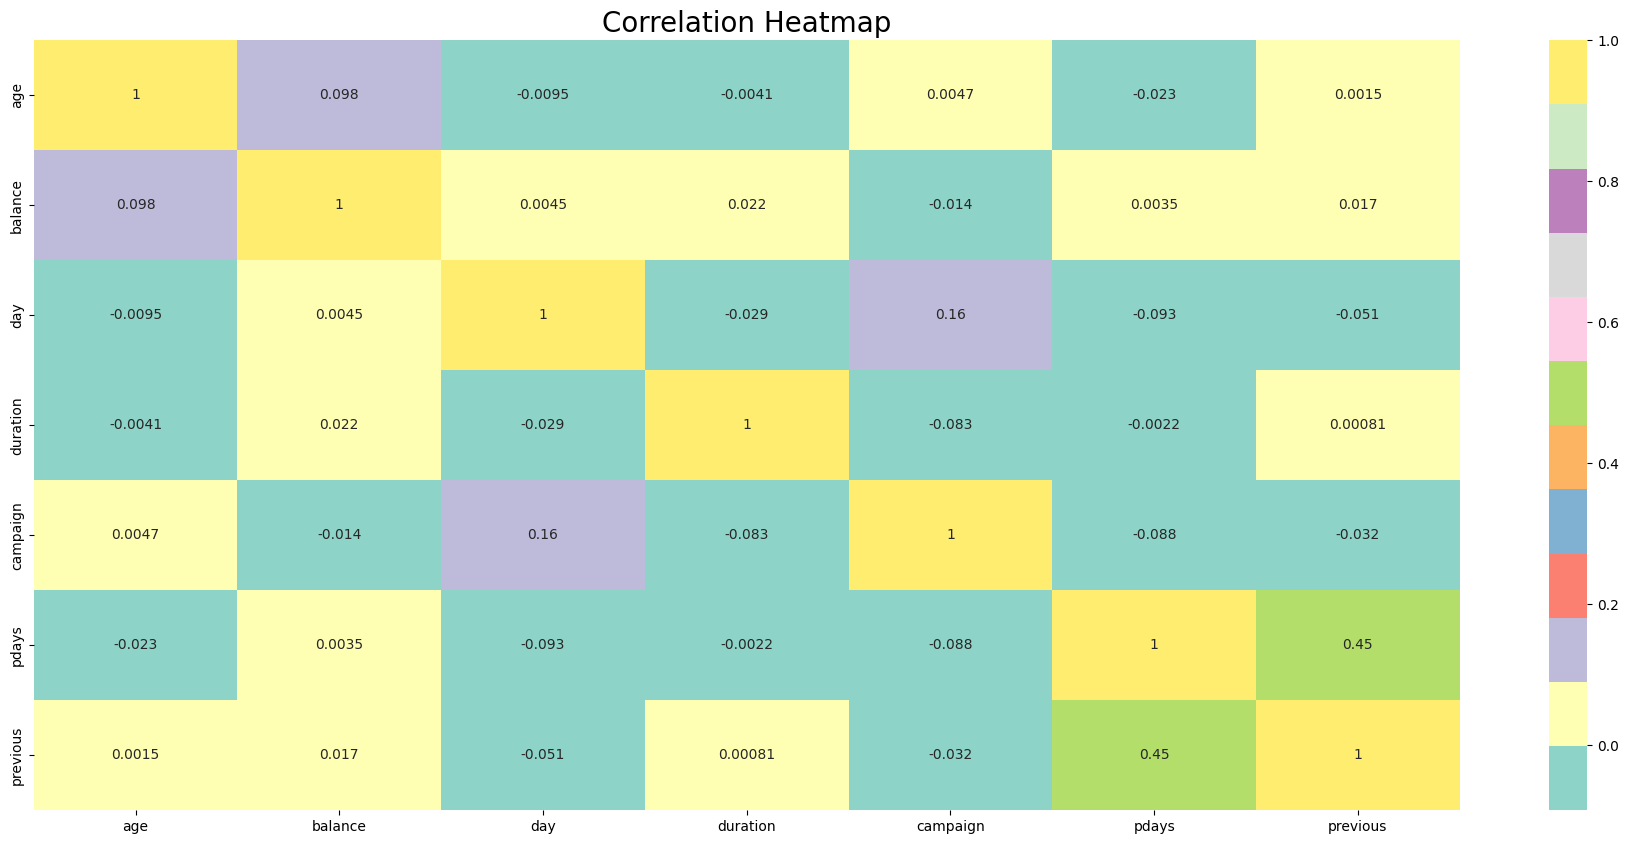

In [29]:
plt.figure(figsize=(23,10))
sns.heatmap(df.corr(), cmap='Set3', annot=True)
plt.title('Correlation Heatmap', fontsize=20, color='black') 
plt.show()

# Model building - Decision Tree Classifier

In [31]:
# Encode categorical variables
lb = LabelEncoder()
df_encoded = df.apply(lb.fit_transform)

In [32]:
# Define independent and dependent variables
x = df_encoded.drop('deposit', axis=1)  # Independent variable
y = df_encoded['deposit']                 # Dependent variable
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (45098, 16)
Shape of y: (45098,)


In [33]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (33823, 16)
Shape of x_test: (11275, 16)
Shape of y_train: (33823,)
Shape of y_test: (11275,)


In [34]:
# Create and train the Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [35]:
# Function to evaluate the model
def eval_model(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy Score:', acc)
    
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)
    
    print('Classification Report:\n', classification_report(y_test, y_pred))


In [37]:
#Function to calculate training and testing scores
def mscore(model):
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print('Training Score:', train_score)  
    print('Testing Score:', test_score)

In [38]:
# Predict on the test set
ypred_dt = dt.predict(x_test)

# Evaluate the model's performance
eval_model(y_test, ypred_dt)

# Calculate training and testing scores
mscore(dt)


Accuracy Score: 0.8980931263858093
Confusion Matrix:
 [[9644  322]
 [ 827  482]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      9966
           1       0.60      0.37      0.46      1309

    accuracy                           0.90     11275
   macro avg       0.76      0.67      0.70     11275
weighted avg       0.88      0.90      0.89     11275

Training Score: 0.9036158826833811
Testing Score: 0.8980931263858093


In [39]:
# Predict on the test set
ypred_dt = dt.predict(x_test)

# Evaluate the model's performance
print("=== Model Evaluation ===")
eval_model(y_test, ypred_dt)

# Calculate training and testing score
print("\n=== Model Scores ===")
mscore(dt)

=== Model Evaluation ===
Accuracy Score: 0.8980931263858093
Confusion Matrix:
 [[9644  322]
 [ 827  482]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      9966
           1       0.60      0.37      0.46      1309

    accuracy                           0.90     11275
   macro avg       0.76      0.67      0.70     11275
weighted avg       0.88      0.90      0.89     11275


=== Model Scores ===
Training Score: 0.9036158826833811
Testing Score: 0.8980931263858093


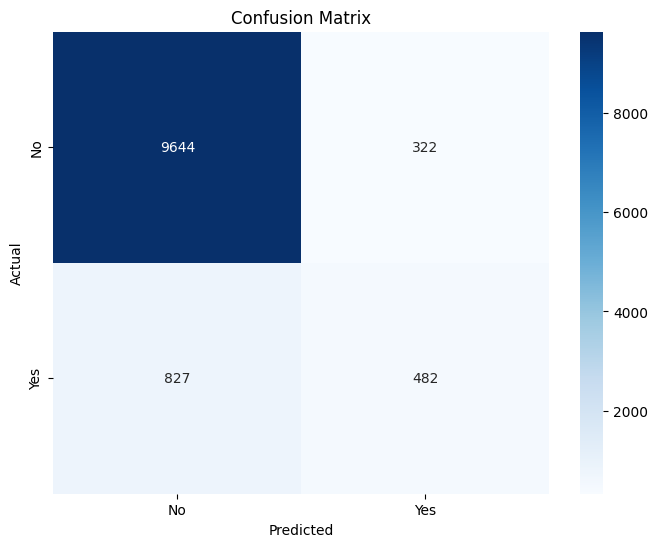

In [40]:
# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, ypred_dt), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

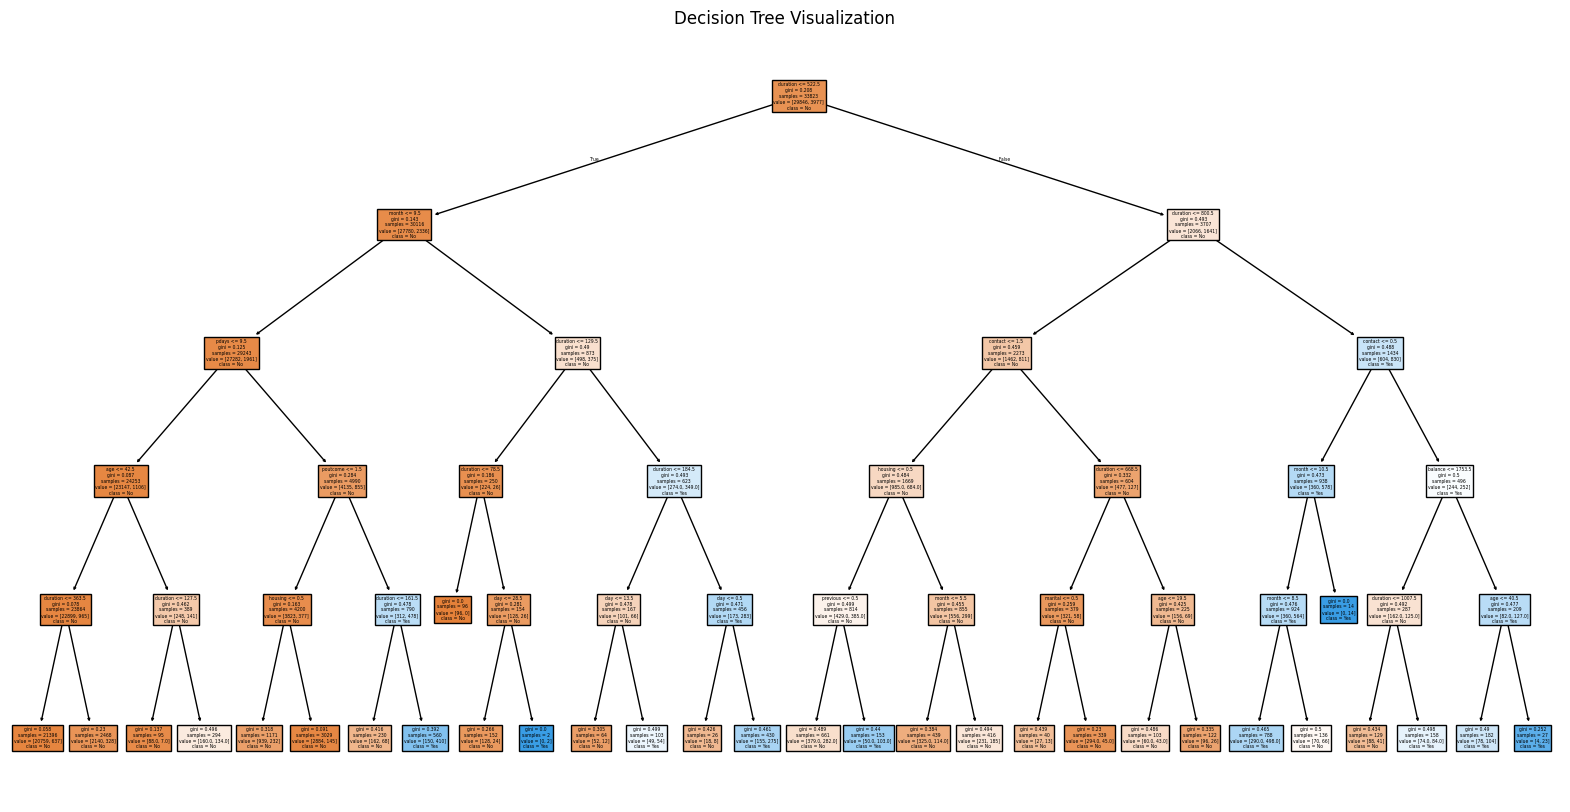

In [41]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=x.columns, class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()